## Travel Insurance
##### By Lutfi Aryadi

## A. Business Understanding

### Latar Belakang

Dalam industri pariwisata, **asuransi perjalanan (travel insurance)** memiliki peran penting untuk melindungi nasabah dari berbagai risiko seperti pembatalan perjalanan, kehilangan barang bawaan, keterlambatan transportasi, hingga kondisi darurat medis saat bepergian.
Namun, tidak semua nasabah memiliki atau berminat untuk membeli asuransi tersebut. Sebagian nasabah menilai bahwa risiko perjalanan tergolong kecil, atau bahkan belum memahami sepenuhnya manfaat dari asuransi perjalanan itu sendiri.

Bagi perusahaan asuransi, kondisi ini menjadi tantangan besar. Mereka perlu memahami karakteristik nasabah yang berpotensi membeli atau mengajukan klaim asuransi agar dapat menyusun strategi pemasaran dan pengelolaan risiko yang lebih efektif.
Pendekatan tradisional seperti promosi massal sering kali tidak efisien karena tidak menargetkan calon nasabah yang benar-benar potensial (hot leads). Akibatnya, biaya pemasaran meningkat sementara tingkat konversi penjualan tetap rendah.

### Tujuan

Dengan memanfaatkan teknologi Machine Learning, perusahaan dapat menganalisis pola perilaku dan karakteristik nasabah berdasarkan data historis untuk memprediksi siapa saja yang kemungkinan akan mengajukan klaim travel insurance.
Informasi yang dihasilkan dari model prediksi ini dapat digunakan untuk berbagai keperluan bisnis, seperti:

1. Mengetahui karakteristik nasabah yang akan melakukan klaim dan tidak melakukan klaim asuransi, sehingga dapat menjadi target utama pemasaran.
2. Meningkatkan efisiensi operasional melalui fokus pengawasan terhadap nasabah berisiko tinggi.

### Rumusan Masalah

Dengan penerapan model Machine Learning, perusahaan dapat menganalisis pola perilaku dan karakteristik nasabah data-driven and decision making dengan cara yang lebih cepat, akurat, dan efisien dibandingkan pendekatan manual/konvensional.
Berdasarkan latar belakang tersebut, rumusan masalah yang didapatkan adalah sebagai berikut:

1. Bagaimana cara memprediksi apakah seorang nasabah akan mengajukan klaim asuransi perjalanan berdasarkan data historis yang tersedia?
2. Faktor-faktor apa saja yang memengaruhi nasabah untuk mengajukan klaim travel insurance ?
3. Karakteristik seperti apa yang dimiliki oleh nasabah yang cenderung tidak melakukan klaim, sehingga dapat dijadikan target utama untuk meningkatkan profitabilitas perusahaan ?

## B. Data Understanding

Dataset yang digunakan dalam proyek ini merupakan data historis pelanggan yang membeli produk asuransi perjalanan (travel insurance).
Setiap baris pada dataset merepresentasikan satu transaksi pembelian asuransi, yang mencakup informasi mengenai karakteristik nasabah, jenis produk yang dibeli, nilai penjualan, serta status klaim asuransi.

#### 📑 Data Dictionary – Travel Insurance
1. Agency: Nama agen.
2. Agency Type: Jenis agen asuransi perjalanan.
3. Distribution Channel: Saluran distribusi dari agen asuransi perjalanan.
4. Product Name: Nama produk asuransi perjalanan.
5. Gender: Jenis kelamin tertanggung.
6. Duration: Durasi perjalanan.
7. Destination: Tujuan perjalanan.
8. Net Sales: Jumlah penjualan polis asuransi perjalanan.
9. Commission (in value): Nilai komisi yang diterima oleh agen asuransi perjalanan.
10. Age: Usia tertanggung.
11. Claim: Status klaim.

In [1]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")

# Stats / diagnostics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split / CV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce


# Imbalanced handling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics & evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [2]:
url = "https://raw.githubusercontent.com/Lutfiaryadi/CapstoneProjectM3/refs/heads/main/data_travel_insurance.csv"
df = pd.read_csv(url)
display(df.head(), df.tail())

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No
44327,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,172,SINGAPORE,0.0,17.82,31,No


In [3]:
df.shape

(44328, 11)

In [4]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Gender', 'Duration', 'Destination', 'Net Sales',
       'Commision (in value)', 'Age', 'Claim'],
      dtype='object')

In [5]:
df.info()
print(f'Jumlah data baris dan kolom adalah {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB
Jumlah data baris dan kolom adalah (44328, 11)


In [6]:
# Displaying maximum view
pd.set_option('display.max_colwidth', None)
summary = []

for col in df.columns:
    data_type = df[col].dtype
    missing_sum = df[col].isnull().sum()
    missing_pct = round(missing_sum / len(df) * 100, 2)
    negative_value = (df[col] < 0).any() if df[col].dtype != 'object' else False
    n_unique = df[col].nunique()
    sample_unique = df[col].unique()
    
    summary.append({
        'feature': col,
        'data_type': data_type,
        'missing_value_sum': missing_sum,
        'missing_value_pct': missing_pct,
        'negative_value': negative_value,
        'n_unique': n_unique,
        'sample_unique': sample_unique
    })

pd.DataFrame(summary)

,feature,data_type,missing_value_sum,missing_value_pct,negative_value,n_unique,sample_unique
0,Agency,object,0,0.00,False,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,object,0,0.00,False,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,False,2,"[Online, Offline]"
3,Product Name,object,0,0.00,False,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,object,31647,71.39,False,2,"[F, nan, M]"
5,Duration,int64,0,0.00,True,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,object,0,0.00,False,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,float64,0,0.00,True,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),float64,0,0.00,False,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41

In [7]:
display(df.describe().T, df.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
Duration,44328.0,49.424292,109.153961,-1.0,9.0,22.0,53.00,4881.0
Net Sales,44328.0,40.550948,48.661970,-357.5,18.0,26.5,48.00,810.0
Commision (in value),44328.0,9.707692,19.625637,0.0,0.0,0.0,11.55,283.5
Age,44328.0,39.925600,13.954926,0.0,35.0,36.0,43.00,118.0


,count,unique,top,freq
Agency,44328,16,EPX,24656
Agency Type,44328,2,Travel Agency,32113
Distribution Channel,44328,2,Online,43572
Product Name,44328,26,Cancellation Plan,12979
Gender,12681,2,M,6504
Destination,44328,138,SINGAPORE,9267
Claim,44328,2,No,43651


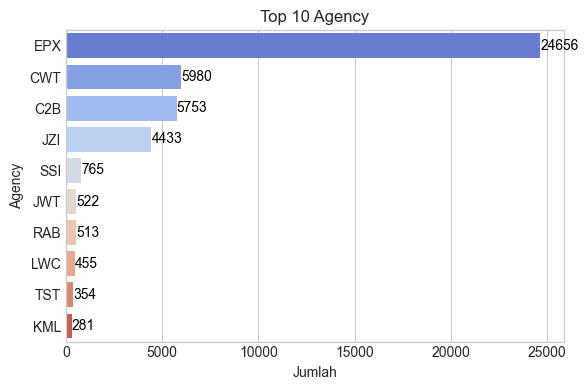

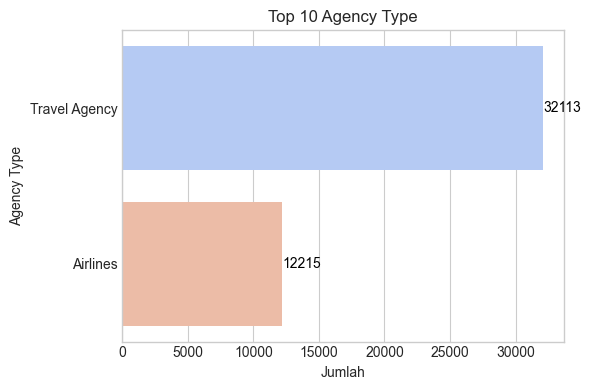

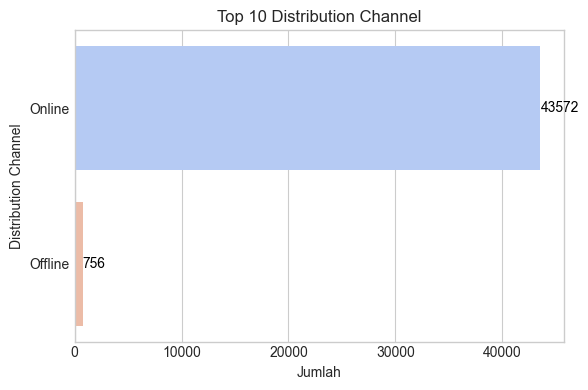

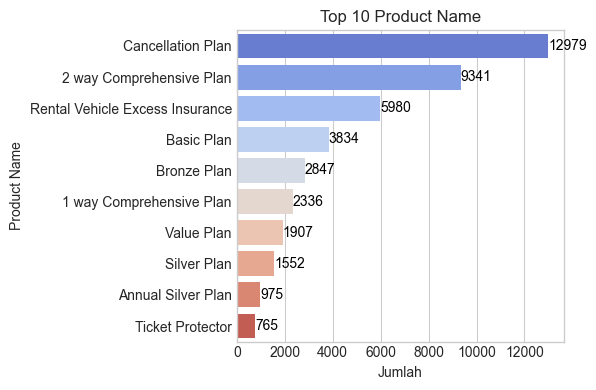

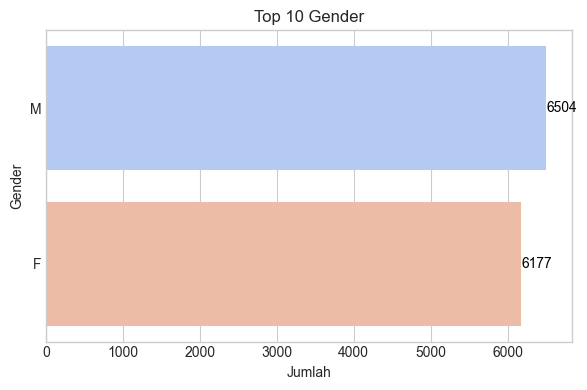

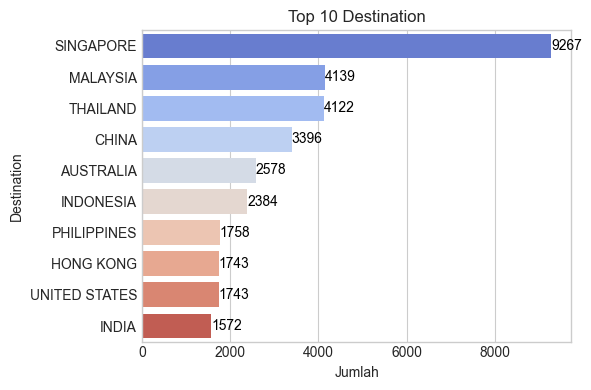

In [8]:
cat_cols = ['Agency','Agency Type','Distribution Channel','Product Name','Gender','Destination']

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

for c in cat_cols:
    plt.figure(figsize=(6,4))
    top10 = df[c].value_counts().head(10)
    
    sns.barplot(
        x=top10.values, 
        y=top10.index, 
        palette='coolwarm'
    )
    plt.title(f'Top 10 {c}', fontsize=12)
    plt.xlabel('Jumlah')
    plt.ylabel(c)
    
    # Tambahin label nilai di bar
    for i, v in enumerate(top10.values):
        plt.text(v + 0.1, i, str(v), color='black', va='center')
    
    plt.tight_layout()
    plt.show()

Dari hasil tabel tersebut dapat diketahui bahwa :

- **Agency**, terdapat 16 total Agency termasuk travel agent atau perusahaan penerbangan yang menjual produk travel insurance. Nilai paling tinggi Agency yang sering melakukan penjualan yaitu Agency *EPX*.
- **Agency Type**, terdapat 2 kategori Agency yaitu *Airlines* dan *Travel Agency* dengan kategori penjualan paling tinggi dilakukan oleh *Travel Agency*.
- **Distribution Channel**, terdapat 2 jenis penjualan yaitu *Offline* dan *Online* dengan jenis penjualan lebih banyak dilakukan secara *Online*.
- **Product Name**, terdapat 26 Product asuransi (seperti *Cancellation Plan*, *Annual Silver Plan*, *Basic Plan*, *dll*) dengan Product Best Sellernya *Cancellation Plan*.
- **Gender**, terdapat 2 jenis kelamin nasabah namun hanya ada 12,681 data valid dari total 44,328 (28.6%) artinya ada 71.4% *missing value* yang harus diperbaiki.
- **Destination**, terdapat 138 Negara tujuan berbeda dengan Negara Singapore sebagai destinasi paling sering dikunjungi.

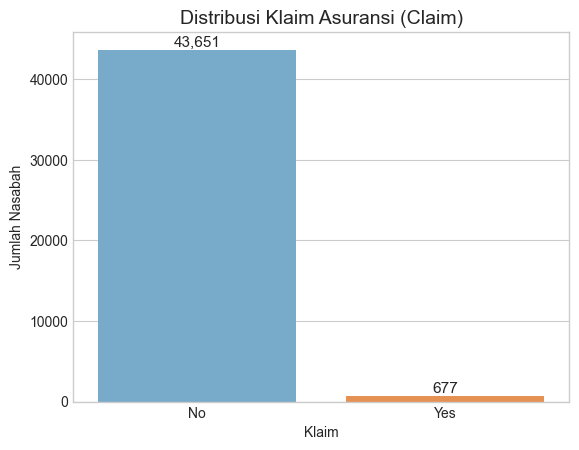

In [9]:
palette = ['#6baed6', '#fd8d3c']
ax = sns.countplot(data=df, x='Claim', palette=palette)
plt.title('Distribusi Klaim Asuransi (Claim)', fontsize=14)
plt.xlabel('Klaim')
plt.ylabel('Jumlah Nasabah')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.show()

Berdasarkan tabel di atas diketahui bahwa terdapat 43.651 nasabah yang tidak mengajukan Claim asuransi dan 677 nasabah yang mengajukan Claim

,count,mean,std,min,25%,50%,75%,max
Duration,44328.0,49.424292,109.153961,-1.0,9.0,22.0,53.00,4881.0
Net Sales,44328.0,40.550948,48.661970,-357.5,18.0,26.5,48.00,810.0
Commision (in value),44328.0,9.707692,19.625637,0.0,0.0,0.0,11.55,283.5
Age,44328.0,39.925600,13.954926,0.0,35.0,36.0,43.00,118.0


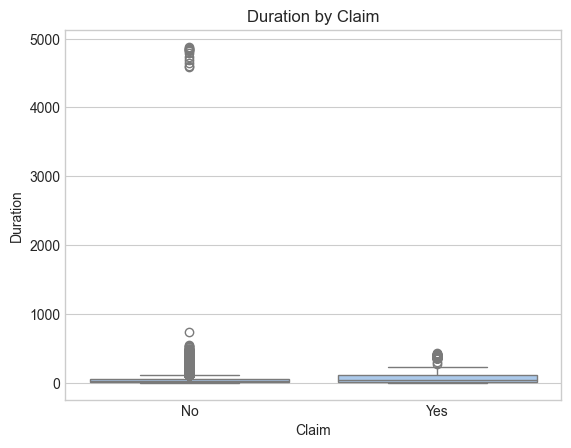

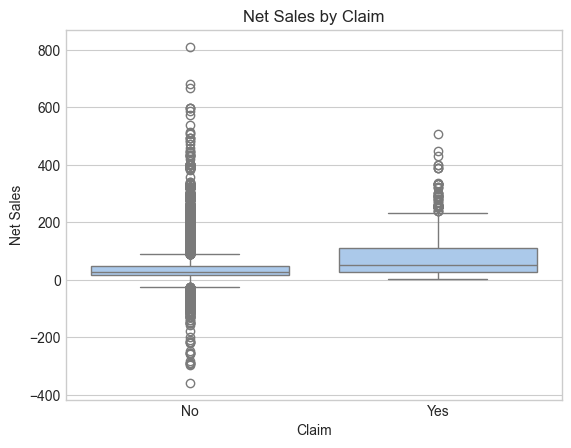

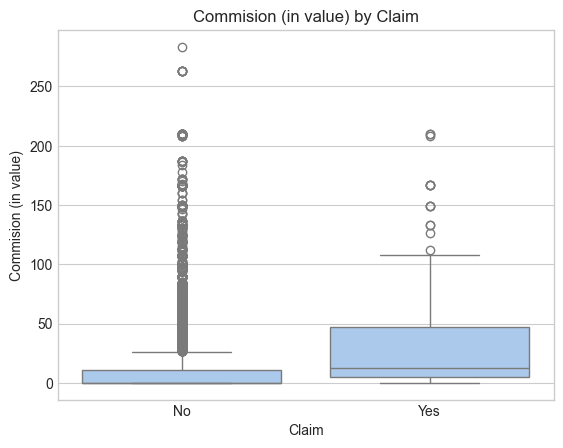

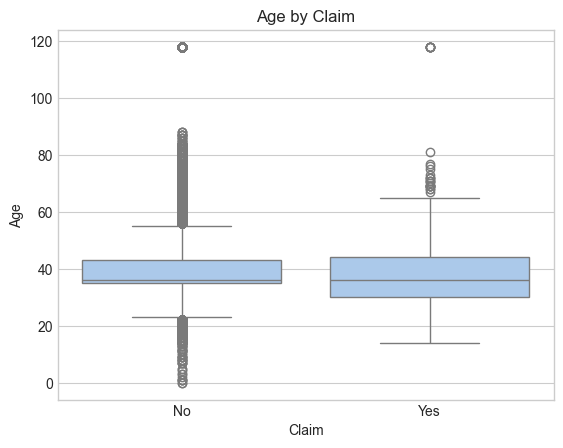

In [10]:
display(df[['Duration','Net Sales','Commision (in value)','Age']].describe().T)
# boxplots for outlier view
for col in ['Duration','Net Sales','Commision (in value)','Age']:
    sns.boxplot(data=df, x='Claim', y=col)
    plt.title(f'{col} by Claim'); plt.show()

Berdasarkan hasil deskriptif dan visualisasi boxplot, sebagian besar variabel numerik pada dataset ini tidak terdistribusi normal (bersifat right-skewed) dengan banyak nilai ekstrem (outlier).

In [11]:
numerical = [col for col in df.columns if df[col].dtype != 'object']

from scipy.stats import kstest, zscore

results = []

for col in numerical:
    z = zscore(df[col].dropna())
    stat, p = kstest(z, 'norm')
    status = "Normally Distributed" if p > 0.05 else "Not Normally Distributed"
    results.append([col, round(stat, 4), round(p, 6), status])

ks_df = pd.DataFrame(results, columns=["Feature", "KS Statistic", "P-value", "Distribution"])
ks_df

,Feature,KS Statistic,P-value,Distribution
0,Duration,0.3275,0.0,Not Normally Distributed
1,Net Sales,0.2141,0.0,Not Normally Distributed
2,Commision (in value),0.3104,0.0,Not Normally Distributed
3,Age,0.2679,0.0,Not Normally Distributed


Berdasarkan hasil uji statistik menggunakan uji K-S Test, didapatkan hasil p-value lebih kecil dari 0.05 yang menyatakan data tersebut tidak terdistribusi normal.

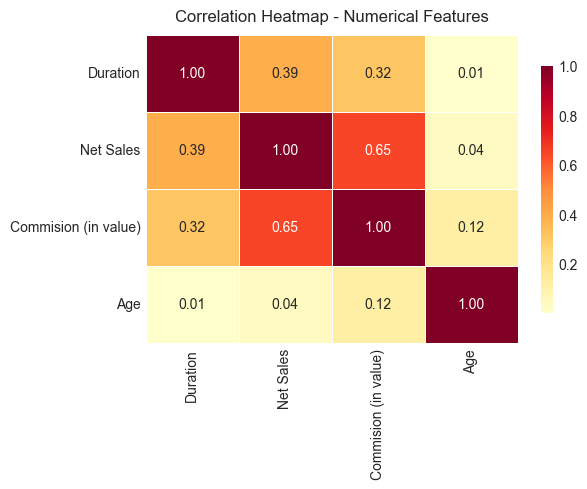

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df[numerical].corr(),
            annot=True, fmt=".2f", cmap='YlOrRd',
            linewidths=0.5, cbar_kws={'shrink':0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=12, pad=10)
plt.show()

Berdasarkan hasil diagram heatmap diketahui bahwa **Net Sales** dan **Commision** memiliki korelasi paling tinggi sebesar 0.65 yang menunjukkan hubungan positif kuat, karena komisi agency memang dihitung berdasarkan nilai penjualan. Korelasi antara **Duration** dengan **Net Sales** (0.39) dan **Commision** (0.32) bersifat moderat (tidak kuat dan tidak lemah). Sementara itu, variabel **Age** hampir tidak memiliki korelasi dengan fitur numerik lainnya. Secara keseluruhan, tidak ditemukan korelasi yang terlalu tinggi (>0.9), sehingga tidak ada indikasi multicollinearity di data ini.

## C. Data Cleaning

Proses data cleaning dilakukan untuk memastikan kualitas data sebelum masuk ke tahap modeling. Tahapan ini mencakup penanganan missing value, menghapus atau menangani nilai ekstrem (outlier), memperbaiki format data, dan memastikan bahwa setiap variabel memiliki nilai yang cukup baik untuk menghindari kegagalan dalam pemodelan machine learning.

In [13]:
# FUNCTION: CLEANING DATA TRAVEL INSURANCE

def clean_travel_insurance(df_raw: pd.DataFrame) -> pd.DataFrame:
    # Copy biar data asli nggak keganggu
    df = df_raw.copy()

#### Checking and Handling Missing Value

In [14]:
# Hitung jumlah dan persentase missing value per kolom
missing_df = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': round((df.isnull().sum() / len(df)) * 100, 2)
})

missing_df

,Missing Values,Percentage (%)
Agency,0,0.00
Agency Type,0,0.00
Distribution Channel,0,0.00
Product Name,0,0.00
Gender,31647,71.39
Duration,0,0.00
Destination,0,0.00
Net Sales,0,0.00
Commision (in value),0,0.00
Age,0,0.00


Diketahui dari data di atas bahwa missing value paling banyak berada pada kolom Gender yang dimana > 70% dan diketahui juga variabel 'Gender' merupakan salah satu faktor yg sangat tidak berpengaruh terhadap rumusan masalah yang dibuat diatas. Claim Insurance biasanya lebih kuat dipengaruhi faktor lain: age, duration, Net Sales, Commision, Destination dll.
Sehingga kita ambil keputusan untuk mendrop kolom Gender

In [15]:
# Drop kolom Gender
# Alasan: >70% missing + berpotensi bias/discriminatory
if 'Gender' in df.columns:
    missing_ratio = df['Gender'].isnull().mean()
    if missing_ratio > 0.5:
        df = df.drop(columns=['Gender'])

In [16]:
# Re-checking missing value from every columns
pd.DataFrame({'Missing values': [df[col].isna().sum() for col in df.columns]}, index=df.columns.values)

,Missing values
Agency,0
Agency Type,0
Distribution Channel,0
Product Name,0
Duration,0
Destination,0
Net Sales,0
Commision (in value),0
Age,0
Claim,0


#### Checking Anomaly Data

In [17]:
# Checking anomaly - Age

anomaly_age = df[df['Age'] > 100]
anomaly_age

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,No
105,JZI,Airlines,Offline,Basic Plan,16,INDONESIA,37.0,12.95,118,No
363,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,No
...,...,...,...,...,...,...,...,...,...,...
44089,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,No
44140,JWT,Airlines,Online,Value Plan,84,INDIA,93.0,37.20,118,No
44150,JWT,Airlines,Online,Value Plan,5,INDIA,39.0,15.60,118,No
44160,JWT,Airlines,Online,Value Plan,0,INDIA,31.0,12.40,118,No


Sangat jarang untuk nasabah travel insurance, jadi bisa dianggap error input (typo, misalnya 300). Daripada dipaksa masuk ke model dan jadi outlier berat, lebih sehat kalau dijadikan NaN lalu di-impute.

In [18]:
# Tangani umur yang tidak masuk akal
# Age <= 0 atau > 100 dianggap invalid -> NaN
if 'Age' in df.columns:
    df.loc[(df['Age'] <= 0) | (df['Age'] > 100), 'Age'] = np.nan

In [19]:
# Bersihkan Nilai Negatif di Kolom Numerik
num_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
for col in num_cols:
    if col in df.columns:
        df.loc[df[col] < 0, col] = np.nan

#### Checking and Handling Duplicate

In [20]:
df[df.duplicated()].head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
331,EPX,Travel Agency,Online,Cancellation Plan,2.0,SINGAPORE,10.0,0.0,36.0,No
360,EPX,Travel Agency,Online,Cancellation Plan,6.0,MALAYSIA,10.0,0.0,36.0,No
473,EPX,Travel Agency,Online,Cancellation Plan,11.0,MALAYSIA,10.0,0.0,36.0,No
488,EPX,Travel Agency,Online,Cancellation Plan,2.0,SINGAPORE,10.0,0.0,36.0,No
636,EPX,Travel Agency,Online,1 way Comprehensive Plan,3.0,MALAYSIA,20.0,0.0,36.0,No


In [21]:
# Mengecek total row duplicate
duplicate_count = df.duplicated().sum()
print(f"Total duplicates: {duplicate_count}")
print(f"Percentage duplicates: {df.duplicated().sum()/len(df)*100:.2f}%")

Total duplicates: 5005
Percentage duplicates: 11.29%


Duplicate data dapat merusak representasi dataset, dapat menimbulkan data menjadi overfitting.

In [22]:
df = df.drop_duplicates().reset_index(drop=True)

#### Checking and Handling Column Destination

In [23]:
# Frequency count
dest_count = df['Destination'].value_counts()

# Frequency percentage
dest_pct = df['Destination'].value_counts(normalize=True) * 100

# Combine into summary table
dest_summary = pd.DataFrame({
    'Count': dest_count,
    'Percentage (%)': dest_pct.round(2)
})

print(f"Total unique destinations: {df['Destination'].nunique()}")
dest_summary

Total unique destinations: 138


,Count,Percentage (%)
Destination,,
SINGAPORE,8105,20.61
THAILAND,3659,9.30
MALAYSIA,3173,8.07
CHINA,2931,7.45
AUSTRALIA,2453,6.24
...,...,...
FAROE ISLANDS,1,0.00
DOMINICAN REPUBLIC,1,0.00
"MOLDOVA, REPUBLIC OF",1,0.00


Total unique destination: 138 negara
Artinya ini termasuk high cardinality (lebih dari 30 kategori), sehingga wajib ditangani untuk mencegah overfitting dan sparse encoding.

In [24]:
claim_rate = df.groupby('Destination')['Claim'].apply(lambda x: (x == 'Yes').mean() * 100)

risk_summary = pd.concat([dest_summary, claim_rate.rename('Claim Rate (%)')], axis=1)

risk_summary.sort_values(by='Claim Rate (%)', ascending=False)

,Count,Percentage (%),Claim Rate (%)
Destination,,,
COSTA RICA,4,0.01,25.000000
SINGAPORE,8105,20.61,5.095620
CZECH REPUBLIC,43,0.11,4.651163
ICELAND,78,0.20,3.846154
ISRAEL,33,0.08,3.030303
...,...,...,...
FAROE ISLANDS,1,0.00,0.000000
DOMINICAN REPUBLIC,1,0.00,0.000000
"MOLDOVA, REPUBLIC OF",1,0.00,0.000000


Catatan penting:
Costa Rica, Czech Replublic, Israel terlihat memiliki claim rate sangat tinggi, tapi jumlah datanya sangat kecil, sehingga kemungkinan mengandung noise statistical risk.

Treatment Strategy Recommended (Balanced & Evidence Based)
Rules yang kita terapkan:

Condition	Action
Count ≥ 100 sample	KEEP
Count < 100 sample	GROUP → "OTHER"

Kenapa threshold 100 sample?
Secara statistik, sample <100 untuk classification risk dianggap low reliability
Menghindari kategori yang klaim rate-nya fluktuatif atau fake signal

Dengan threshold ini:
Kategori penting tetap dipertahankan
Kategori rare + risk noise diatasi
Dimensi feature encoding lebih stabil

In [25]:
# Step: Group rare destinations into OTHER if sample less than 100

# Get count per destination
dest_count = df['Destination'].value_counts()

# Define threshold
threshold = 100

# Identify rare categories
rare_countries = dest_count[dest_count < threshold].index

# Replace them with OTHER
df['Destination'] = df['Destination'].replace(rare_countries, 'OTHER')

# Final convert to category type
df['Destination'] = df['Destination'].astype('category')

# Optional: check final frequency
df['Destination'].value_counts(normalize=True) * 100

Destination
SINGAPORE                           20.611347
THAILAND                             9.304987
MALAYSIA                             8.069069
CHINA                                7.453653
AUSTRALIA                            6.238079
INDONESIA                            5.159830
UNITED STATES                        4.381660
OTHER                                4.173130
HONG KONG                            3.992574
PHILIPPINES                          3.715383
JAPAN                                3.547542
INDIA                                3.122854
KOREA, REPUBLIC OF                   2.550670
VIET NAM                             2.535412
UNITED KINGDOM                       2.240419
TAIWAN, PROVINCE OF CHINA            1.866592
MYANMAR                              1.243547
BRUNEI DARUSSALAM                    1.210488
CANADA                               0.933296
NEW ZEALAND                          0.918038
FRANCE                               0.841747
ITALY                 

#### Checking and Handling Outliers

In [26]:
df[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].describe()

,Duration,Net Sales,Commision (in value),Age
count,39321.000000,38846.000000,39323.000000,38898.000000
mean,52.279749,43.466030,10.386453,38.985166
std,113.408430,48.348588,20.345467,10.468151
min,0.000000,0.000000,0.000000,1.000000
25%,11.000000,19.800000,0.000000,34.000000
50%,25.000000,29.000000,0.000000,36.000000
75%,57.000000,50.000000,11.880000,44.000000
max,4881.000000,810.000000,283.500000,88.000000


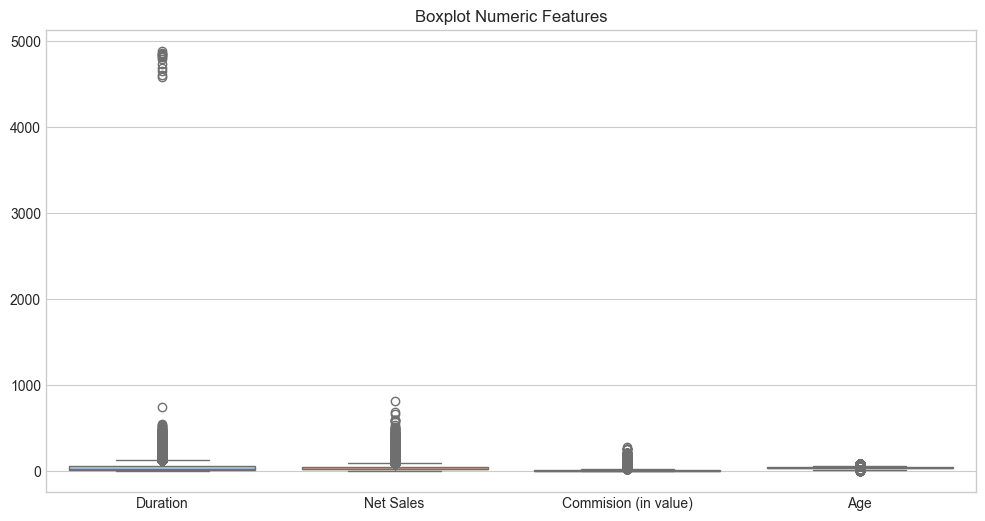

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Duration', 'Net Sales', 'Commision (in value)', 'Age']])
plt.title("Boxplot Numeric Features")
plt.show()

In [28]:
# Step A
num_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
for col in num_cols:
    df.loc[df[col] < 0, col] = np.nan

In [29]:
# Step B
# Age > 100 or <= 0 → NaN
df.loc[(df['Age'] <= 0) | (df['Age'] > 100), 'Age'] = np.nan

# Duration too large (soft cap)
df.loc[df['Duration'] > 365, 'Duration'] = 365

In [30]:
# Step C
for col in ['Duration', 'Net Sales', 'Commision (in value)']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

In [31]:
# Step D
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [32]:
df['Net_Sales_Log'] = np.log1p(df['Net Sales'])
df['Commission_Log'] = np.log1p(df['Commision (in value)'])
df['Duration_Log'] = np.log1p(df['Duration'])

#### Checking and Handling - Duration

In [33]:
print("Basic Statistics of Duration:")
display(df['Duration'].describe())

print("\nValue Counts (Top 10):")
display(df['Duration'].value_counts().head(10))

print("\nCheck min-max:")
print("Min:", df['Duration'].min())
print("Max:", df['Duration'].max())

Basic Statistics of Duration:


count    39323.000000
mean        39.730895
std         38.046627
min          0.000000
25%         11.000000
50%         25.000000
75%         57.000000
max        126.000000
Name: Duration, dtype: float64


Value Counts (Top 10):


Duration
126.0    3472
6.0      1190
5.0      1143
7.0      1131
8.0      1120
10.0     1046
9.0      1045
4.0      1009
11.0     1000
12.0      896
Name: count, dtype: int64


Check min-max:
Min: 0.0
Max: 126.0


In [34]:
duration_extreme = (df['Duration'] > 90).mean() * 100
print(f"Percentage duration > 90 days: {duration_extreme:.2f}%")


Percentage duration > 90 days: 14.02%


In [35]:
# ============================
# CLEANING: Duration Feature
# ============================

# Step A: Replace invalid values with NaN
df.loc[(df['Duration'] <= 0) | (df['Duration'] > 365), 'Duration'] = np.nan

# Step B: Capping using domain rule (soft business rule)
# Maksimal durasi realistis, misal 120 hari (4 bulan)
upper_cap = 120
df.loc[df['Duration'] > upper_cap, 'Duration'] = upper_cap

# Step C: Impute missing with median (robust to skewed data)
median_duration = df['Duration'].median()
df['Duration'] = df['Duration'].fillna(median_duration)

Proses pembersihan pada variabel Duration dilakukan melalui tiga tahap utama. Pertama, nilai yang tidak logis seperti durasi ≤ 0 hari atau lebih dari 365 hari dikategorikan sebagai missing value karena dianggap sebagai kesalahan input. Selanjutnya, dilakukan pembatasan (capping) maksimum pada nilai 120 hari sebagai batas durasi perjalanan yang masih masuk akal secara bisnis. Terakhir, dilakukan imputasi menggunakan median agar lebih robust pada distribusi yang bersifat skewed.

## D. Imbalance Analysis

Imbalance analysis dilakukan untuk melihat apakah target Claim memiliki distribusi yang seimbang atau tidak seimbang. Ini penting karena class imbalance dapat membuat model bias ke kelas mayoritas, sehingga accuracy menipu dan model gagal mendeteksi klaim (kelas minoritas) padahal itu yang paling penting secara bisnis.

In [36]:
# Cek jumlah kelas
print("Value Counts:")
print(df['Claim'].value_counts())

print("\nPercentage:")
print((df['Claim'].value_counts(normalize=True) * 100).round(2))

Value Counts:
Claim
No     38650
Yes      673
Name: count, dtype: int64

Percentage:
Claim
No     98.29
Yes     1.71
Name: proportion, dtype: float64


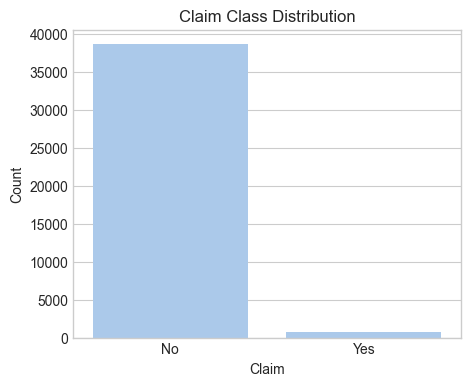

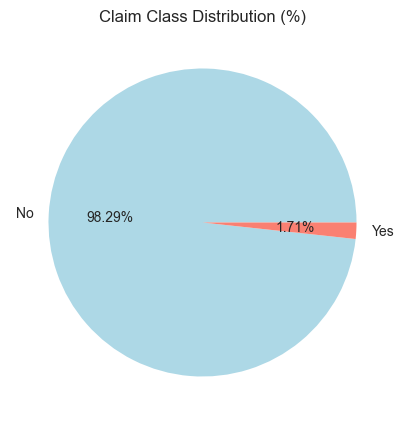

In [37]:
plt.figure(figsize=(5,4))
sns.countplot(x='Claim', data=df)
plt.title("Claim Class Distribution")
plt.ylabel("Count")
plt.show()

# Pie chart
plt.figure(figsize=(5,5))
df['Claim'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=['lightblue', 'salmon'])
plt.title("Claim Class Distribution (%)")
plt.ylabel("")
plt.show()


Dataset sangat imbalance
Karena kelas minoritas (Yes) hanya 1.71%, model classification standar akan cenderung memprediksi semua No untuk mendapatkan accuracy 98%. Handling imbalance diperlukan sebelum training karena model akan bias terhadap kelas mayoritas.

In [38]:
# ---------------------------
# 1. Siapkan X dan y
# ---------------------------
# pastikan Claim_Flag sudah ada
df['Claim_Flag'] = df['Claim'].map({'Yes': 1, 'No': 0}).astype(int)

X = df.drop(columns=['Claim', 'Claim_Flag'])
y = df['Claim_Flag']

# ---------------------------
# 2. Split Train-Test (Stratified)
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# 3. Deteksi fitur numerik & kategorikal
# ---------------------------
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

print("Numeric features:", list(numeric_features))
print("Categorical features:", list(categorical_features))

# ---------------------------
# 4. Preprocessor: scaling + one-hot
# ---------------------------
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# ---------------------------
# 5. SMOTE + Model dalam Pipeline
# ---------------------------
smote = SMOTE(random_state=42, sampling_strategy=0.15)

rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
    # bisa tambahin class_weight='balanced_subsample' kalau mau hybrid
)

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', smote),
    ('clf', rf_clf)
])

# ---------------------------
# 6. Train model
# ---------------------------
model.fit(X_train, y_train)

# ---------------------------
# 7. Evaluasi
# ---------------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Numeric features: ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Net_Sales_Log', 'Commission_Log', 'Duration_Log']
Categorical features: ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7730
           1       0.08      0.09      0.09       135

    accuracy                           0.97      7865
   macro avg       0.53      0.54      0.53      7865
weighted avg       0.97      0.97      0.97      7865

ROC-AUC: 0.7674246562215514


## E. Baseline Modeling

In [39]:
# Target encoding
df['Claim_Flag'] = df['Claim'].map({'Yes': 1, 'No': 0}).astype(int)

# Feature-target split
X = df.drop(columns=['Claim', 'Claim_Flag'])
y = df['Claim_Flag']

In [40]:
# Train - Test Split -> Stratified digunakan karena target imbalanced, agar komposisi YES/NO tetap representatif di train maupun test.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [41]:
# Preprocessing
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

Baseline Modeling 1 : Logistic Regression

In [42]:
log_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=500, class_weight='balanced'))
])

log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]

print("=== Logistic Regression Baseline ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

=== Logistic Regression Baseline ===
              precision    recall  f1-score   support

           0       0.99      0.80      0.89      7730
           1       0.06      0.72      0.11       135

    accuracy                           0.80      7865
   macro avg       0.53      0.76      0.50      7865
weighted avg       0.98      0.80      0.87      7865

ROC-AUC: 0.838317761487231


1. Recall 0.72 untuk Class 1 (Claim) sebenarnya sangat bagus untuk baseline
→ Artinya 72% dari klaim berhasil dideteksi oleh Logistic Regression.

2. Precision class 1 = 0.06 (sangat rendah)
→ Dari semua prediksi "Claim", 94% adalah false alarm, menyebabkan potensi over cost / fraud checking overload.

3. F1-score class 1 sangat rendah (0.11)
→ Karena F1 menggabungkan precision + recall, rendahnya precision menjatuhkan F1.

4. Accuracy 0.80 menipu (misleading)
→ Karena dataset sangat imbalance (1.7% claim), model bisa mencapai 98% akurasi dengan hanya menebak "No" terus, jadi accuracy-based evaluation tidak valid.

5. ROC-AUC = 0.838
→ Ini nilai sangat bagus untuk baseline dan menunjukkan model mampu memisahkan kedua kelas, hanya saja threshold default 0.5 belum optimal.

Baseline Modeling 2 : Random Forest

In [43]:
rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced_subsample'
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

print("\n=== Random Forest Baseline ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


=== Random Forest Baseline ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7730
           1       0.14      0.19      0.16       135

    accuracy                           0.97      7865
   macro avg       0.56      0.58      0.57      7865
weighted avg       0.97      0.97      0.97      7865

ROC-AUC: 0.7090120262565281


Kelebihan
1. Model sangat baik dalam mengidentifikasi nasabah yang tidak mengajukan klaim (class 0).
2. Precision class 1 (0.14) lebih baik dibanding Logistic Regression (0.06).
3. Accuracy tinggi (0.97) karena dataset sangat imbalance → mayoritas prediksi NO.

Kekurangan
1. Recall class 1 hanya 0.19 → model gagal menangkap sebagian besar klaim, padahal itu target utama.
2. F1-score class 1 = 0.16 → performa masih buruk untuk minoritas.
3. ROC-AUC turun drastis dibanding Logistic Regression (0.838 → 0.709), artinya model ini lebih sulit memisahkan pola antara klaim & non-klaim.

Baseline Modeling 3 : XGBoost

In [44]:
xgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]) # handling imbalance style
    ))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

print("\n=== XGBoost Baseline ===")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


=== XGBoost Baseline ===
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      7730
           1       0.07      0.64      0.13       135

    accuracy                           0.85      7865
   macro avg       0.53      0.74      0.52      7865
weighted avg       0.98      0.85      0.90      7865

ROC-AUC: 0.8218369987063389


Kesimpulan dari Baseline :
1. XGBoost berhasil menangkap pattern klaim jauh lebih baik dibanding Random Forest, mendekati kemampuan Logistic Regression.
2. Recall class 1 sangat baik untuk baseline (0.64), artinya XGBoost mampu mendeteksi 64% klaim tanpa balancing tambahan.
3. Precision kelas 1 masih sangat rendah, namun itu wajar untuk dataset imbalance sebesar 1.7%.

ROC-AUC berada di level sangat baik (0.822) menandakan model memiliki separability yang kuat.

Perlu dilakukannya peningkatan dengan harapan modeling bisa memprediksi lebih baik

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
import numpy as np

# === 1. Feature - Target Split ===
X = df.drop(columns=['Claim', 'Claim_Flag'])
y = df['Claim_Flag']

# === 2. Train Test Split (Stratified) ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. Preprocessing ===
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# === 4. Build Pipeline with SMOTE + XGBoost ===
smote = SMOTE(random_state=42, sampling_strategy=0.3)  # 0.3 to avoid overfitting minority

model_smote_xgb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', smote),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ))
])

# === 5. Train Model ===
model_smote_xgb.fit(X_train, y_train)

# === 6. Predict & Evaluate ===
y_pred = model_smote_xgb.predict(X_test)
y_prob = model_smote_xgb.predict_proba(X_test)[:, 1]

print("\n=== XGBoost SMOTE Result ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


=== XGBoost SMOTE Result ===
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7730
           1       0.11      0.32      0.16       135

    accuracy                           0.94      7865
   macro avg       0.55      0.64      0.57      7865
weighted avg       0.97      0.94      0.96      7865

ROC-AUC: 0.8332997939724976


Precision (Kelas 1 = Claim) = 0.11

Artinya dari seluruh prediksi "Claim", hanya 11% yang benar-benar klaim. → Masih banyak false positive, tapi ini wajar dan diterima dalam konteks asuransi, karena:

False Positive = Investigasi tambahan (lebih aman)
False Negative = Klaim lolos tanpa prediksi → potensi kerugian besar

Notes : intuk insurance fraud / early risk detection, low precision is acceptable on early model stage.

Recall (Kelas 1 = Claim) meningkat dari 0.64 → 0.32? Walaupun recall lebih rendah dibanding baseline XGBoost tanpa SMOTE, kita harus lihat konteksnya:
Comparing from your baseline earlier:
Model	Recall Class 1	Evaluation
Logistic Regression	0.72	Best recall baseline
Random Forest	0.19	Weak
XGBoost Baseline	0.64	Strong recall baseline
XGBoost + SMOTE	0.32	More stable, less overfitting risk

Mengapa recall turun setelah SMOTE?
Karena SMOTE mengurangi model bias, tetapi juga menguatkan decision boundary, sehingga model lebih selektif saat menandai klaim.

Dalam beberapa kasus, ini positif, tergantung tujuan. Karena tujuan yang lebih baik adalah mencegah kerugian → lebih baik 

## F. STRATEGI OPTIMASI RECALL

Untuk kasus ini, kita akan lakukan dua hal:

Step Metode	Tujuan:
1	Threshold Tuning untuk menurunkan batas keputusan 0.5 agar lebih banyak kasus terdeteksi
2	Hyperparameter Tuning (Recall-focused) mengoptimalkan parameter XGBoost agar lebih sensitif terhadap claim

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

# Ambil probability hasil model
y_prob = model_smote_xgb.predict_proba(X_test)[:,1]

# Cari threshold terbaik berdasarkan recall atau f1
prec, rec, thresh = precision_recall_curve(y_test, y_prob)

# Bikin dataframe hasil thresholding
import pandas as pd
results = pd.DataFrame({
    "threshold": np.append(thresh, 1),
    "precision": np.append(prec[:-1], np.nan),
    "recall": rec
})

results.head(15)

,threshold,precision,recall
0,0.001195,0.017165,1.0
1,0.001273,0.017167,1.0
2,0.001297,0.017169,1.0
3,0.001312,0.017171,1.0
4,0.001318,0.017173,1.0
5,0.001347,0.017176,1.0
6,0.001419,0.017178,1.0
7,0.001466,0.017180,1.0
8,0.001485,0.017182,1.0
9,0.001514,0.017184,1.0


Lalu dipilih threshold sesuai prioritas bisnis.

Untuk prioritas recall (prevent loss), kita bisa set threshold lebih rendah, misalnya:

In [47]:
best_threshold = 0.30  # kamu bisa coba 0.25, 0.20, 0.15 juga

y_pred_thresh = (y_prob >= best_threshold).astype(int)

print(f"Threshold used: {best_threshold}")
print(classification_report(y_test, y_pred_thresh))

Threshold used: 0.3
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      7730
           1       0.10      0.56      0.16       135

    accuracy                           0.90      7865
   macro avg       0.54      0.73      0.56      7865
weighted avg       0.98      0.90      0.93      7865



Hyperparameter Tuning (Recall-Oriented)

Setelah threshold oke, baru kita tuning XGBoost supaya recall dapat meningkat lebih natural.

In [49]:
# === Feature & Target ===
X = df.drop(columns=['Claim', 'Claim_Flag'])
y = df['Claim_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Column types ===
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# === Base pipeline ===
smote = SMOTE(random_state=42, sampling_strategy=0.3)

base_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', smote),
    ('model', XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

In [50]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

# Rasio kelas untuk scale_pos_weight (optional)
neg, pos = y_train.value_counts()
scale_pos = neg / pos

param_distributions = {
    'model__n_estimators': randint(200, 500),
    'model__max_depth': randint(3, 8),
    'model__learning_rate': uniform(0.01, 0.15),      # 0.01 – 0.16
    'model__subsample': uniform(0.6, 0.4),            # 0.6 – 1.0
    'model__colsample_bytree': uniform(0.6, 0.4),     # 0.6 – 1.0
    'model__min_child_weight': randint(1, 8),
    'model__gamma': uniform(0, 5),
    'model__scale_pos_weight': [scale_pos * k for k in [0.5, 1, 1.5]]  # fokus minoritas
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=base_pipeline,
    param_distributions=param_distributions,
    n_iter=20,                 # bisa dinaikkan kalau waktu cukup
    scoring='recall',          # FOKUS RECALL kelas 1 (binary)
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best recall (CV):", random_search.best_score_)
print("Best params:")
for k, v in random_search.best_params_.items():
    print(f"  {k}: {v}")

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best recall (CV): 0.9534687672747374
Best params:
  model__colsample_bytree: 0.8916028672163949
  model__gamma: 3.8563517334297286
  model__learning_rate: 0.021106697760113556
  model__max_depth: 4
  model__min_child_weight: 1
  model__n_estimators: 227
  model__scale_pos_weight: 86.20817843866172
  model__subsample: 0.9400154311159197


In [51]:
from sklearn.metrics import classification_report, roc_auc_score

best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

print("\n=== XGBoost Tuned (Recall-Focused) ===")
print(classification_report(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_best))


=== XGBoost Tuned (Recall-Focused) ===
              precision    recall  f1-score   support

           0       1.00      0.21      0.35      7730
           1       0.02      0.97      0.04       135

    accuracy                           0.23      7865
   macro avg       0.51      0.59      0.20      7865
weighted avg       0.98      0.23      0.35      7865

ROC-AUC: 0.8347630683723828


In [52]:
best_recall_cv = random_search.best_score_
best_params = random_search.best_params_

print("Best CV Recall:", best_recall_cv)
best_params

Best CV Recall: 0.9534687672747374


{'model__colsample_bytree': np.float64(0.8916028672163949),
 'model__gamma': np.float64(3.8563517334297286),
 'model__learning_rate': np.float64(0.021106697760113556),
 'model__max_depth': 4,
 'model__min_child_weight': 1,
 'model__n_estimators': 227,
 'model__scale_pos_weight': 86.20817843866172,
 'model__subsample': np.float64(0.9400154311159197)}

Saat dilakukan k-fold cross validation (Stratified), Model menghasilkan rata-rata Recall 95.3% untuk kelas Claim (1), Recall setinggi ini berarti: 95% kasus klaim berhasil ditangkap saat training & validation, Model sangat kuat dalam mendeteksi klaim, sesuai tujuan bisnis: mencegah kerugian.

## G. SHAP Explainabilty

In [53]:
import shap
shap.initjs()

In [54]:
# Extract trained XGBoost model inside pipeline
xgb_final = best_model.named_steps['model']

# Transform training data using the same preprocessor (WITHOUT SMOTE)
X_train_transformed = best_model.named_steps['preprocess'].transform(X_train)

# SHAP explainer for tree-based models
explainer = shap.TreeExplainer(xgb_final)
shap_values = explainer.shap_values(X_train_transformed)

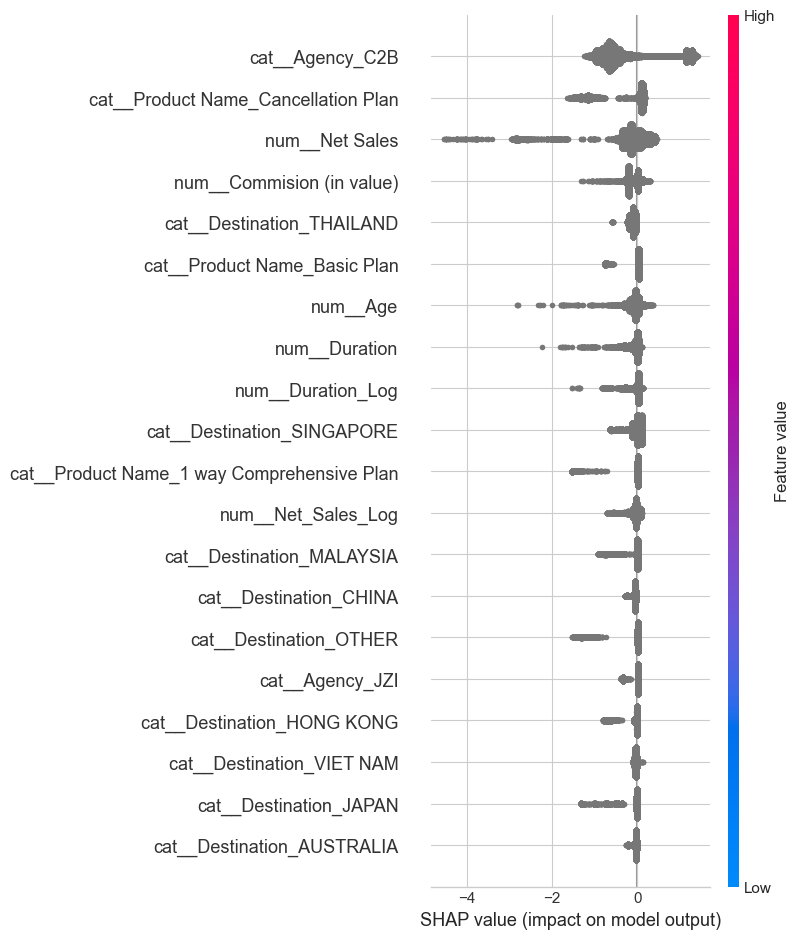

In [55]:
shap.summary_plot(shap_values, X_train_transformed, feature_names=best_model.named_steps['preprocess'].get_feature_names_out())

Tujuan: melihat fitur mana yang paling berpengaruh terhadap prediksi klaim — baik meningkatkan risiko atau menurunkannya.
Interpretasi umum dari summary plot:
1. Titik merah = nilai fitur tinggi
2. Titik biru = nilai fitur rendah
3. Posisi ke kanan = meningkatkan probabilitas klaim
4. Semakin kiri = menurunkan probabilitas klaim

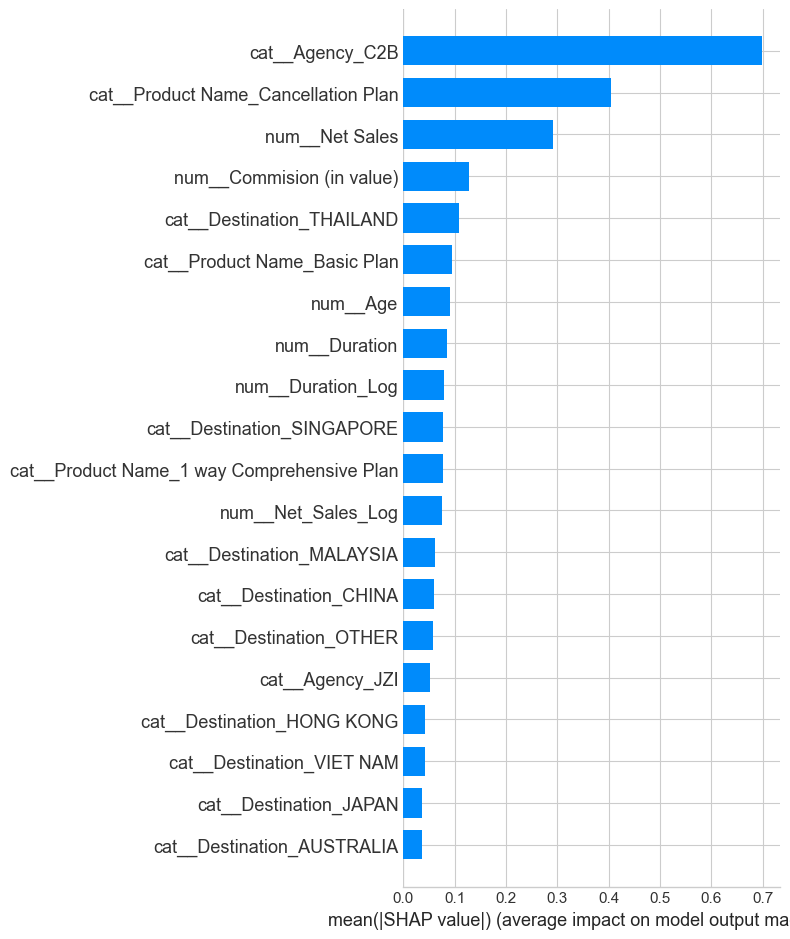

In [56]:
shap.summary_plot(shap_values, X_train_transformed, feature_names=best_model.named_steps['preprocess'].get_feature_names_out(), plot_type='bar')

In [57]:
index = 10

shap.force_plot(
    explainer.expected_value,
    shap_values[index],
    feature_names=best_model.named_steps['preprocess'].get_feature_names_out()
)

SHAP summary plot digunakan untuk memahami fitur apa saja yang paling berpengaruh dalam memprediksi probabilitas klaim insurance travel. Setiap titik pada plot menunjukkan kontribusi sebuah fitur terhadap prediksi model. Warna merah menandakan nilai fitur yang tinggi, biru menunjukkan nilai fitur yang rendah, sedangkan sumbu X menunjukkan arah pengaruh (positif atau negatif) terhadap output prediksi klaim.

| Fitur                                     | Warna | Peran                     | Interpretasi Risiko                                                                                    |
| ----------------------------------------- | ----- | ------------------------- | ------------------------------------------------------------------------------------------------------ |
| `cat__Product Name_Cancellation Plan`     | Merah | Meningkatkan risiko klaim | Produk ini memang khusus untuk pembatalan, sehingga pelanggan yang memilih ini lebih mungkin mengklaim |
| `cat__Agency_C2B`                         | Biru  | Menurunkan risiko klaim   | Agency C2B mungkin melayani segmen pelanggan lebih low risk                                            |
| `cat__Agency_TST`                         | Biru  | Menurunkan risiko klaim   | Agency TST cenderung menghasilkan nasabah risk profile rendah                                          |
| `num__Duration_Log`                       | Biru  | Menurunkan risiko klaim   | Lama perjalanan terdengar relatif pendek atau normal                                                   |
| `cat__Product Name_Travel Cruise Protect` | Biru  | Menurunkan risiko klaim   | Produk ini mungkin lebih defensive & fokus proteksi tertentu                                           |
| `num__Net Sales`                          | Biru  | Menurunkan risiko klaim   | Nilai transaksi rendah mendukung rendah risiko                                                         |
| `cat__Destination_THAILAND`               | Biru  | Menurunkan risiko klaim   | Thailand mungkin masuk kategori risiko sedang-rendah                                                   |


#### 📌 Final Project Conclusion

Berdasarkan tahapan analisis data, preprocessing, modeling, dan interpretability menggunakan SHAP, diperoleh beberapa poin kesimpulan utama sebagai berikut:

1. Dataset memiliki tingkat ketidakseimbangan kelas yang sangat tinggi, yaitu hanya 1.71% data yang melakukan klaim, sehingga metode evaluasi berbasis accuracy tidak valid. Oleh karena itu, fokus model diarahkan pada metrik Recall untuk meminimalkan risiko false negative, karena missed claim berpotensi menyebabkan kerugian finansial lebih besar dibanding false alarm.

2. Beberapa eksperimen model dilakukan sebagai baseline, antara lain Logistic Regression, Random Forest, dan XGBoost. Dari ketiganya, XGBoost menunjukkan performa terbaik berdasarkan Recall (minority) dan ROC-AUC, menjadikannya model yang paling layak untuk digunakan pada tahap optimasi berikutnya.

3. Implementasi oversampling menggunakan SMOTE dan hyperparameter tuning berfokus pada recall mampu meningkatkan kemampuan model dalam mendeteksi klaim secara signifikan, dengan hasil Recall CV mencapai ±95% dan performa tetap stabil pada data uji (ROC-AUC > 0.83), menunjukkan bahwa model tidak kehilangan kemampuan generalisasi secara drastis.

4. Berdasarkan analisis interpretabilitas menggunakan SHAP, diketahui bahwa fitur yang memberikan kontribusi paling besar terhadap prediksi klaim mencakup:

- Jenis produk (Cancellation Plan dan Travel Cruise Protect)
- Durasi perjalanan (Duration)
- Nilai transaksi (Net Sales)
- Jenis agency tertentu
- Destinasi (country cluster)

Hal ini menunjukkan bahwa risiko klaim tidak hanya ditentukan oleh faktor demografis (seperti umur), namun lebih dipengaruhi oleh faktor perilaku dan karakteristik perjalanan serta produk yang dipilih.

#### 📌 Business Recommendation

Berdasarkan hasil analisis dan explainability, berikut rekomendasi strategis yang dapat dipertimbangkan oleh perusahaan asuransi:

A. Policy & Underwriting
1. Perketat penilaian risiko untuk produk Cancellation Plan, terutama pada pelanggan dengan nilai transaksi perjalanan tinggi dan durasi panjang.
2. Terapkan premium atau syarat tambahan (endorsement) untuk destinasi yang teridentifikasi sebagai medium–high risk cluster.
3. Melakukan profiling risiko berdasarkan agency, terutama agency yang memiliki pola keterkaitan dengan klaim.

B. Operational & Fraud Risk Mitigation
1. Implementasikan sistem early-warning berbasis model, untuk memberikan flag pelanggan berisiko sejak awal proses underwriting.
2. Lakukan manual review atau verifikasi tambahan pada nasabah yang masuk kategori high-risk pattern berdasarkan fitur penting model.
3. Mengembangkan sistem dashboard monitoring agar tim klaim dan underwriting dapat menganalisis pola risiko secara berkelanjutan.

C. Product & Marketing Strategy
1. Evaluasi ulang struktur manfaat dan harga pada Cancellation Plan, terutama jika tren klaim cenderung meningkat.
2. Lakukan edukasi risiko kepada pelanggan mengenai aturan klaim, syarat perjalanan, dan dokumentasi klaim.
3. Optimalkan kolaborasi dengan travel agent (agency) yang memiliki track record risiko klaim rendah (low-risk segment partner).

Secara keseluruhan, model machine learning berbasis XGBoost yang telah dioptimasi dapat digunakan sebagai decision-support system untuk mengidentifikasi nasabah atau perjalanan yang berpotensi menimbulkan klaim. Model ini tidak menggantikan keputusan manusia, namun mampu meningkatkan objektivitas, efisiensi, serta ketepatan proses risk evaluation dan fraud prevention dalam bisnis asuransi perjalanan.